In [1]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('./../day 44 task regression/forestfires.csv')

In [4]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [6]:
# Convert area interms of log for normalization

In [7]:
new_area=np.log(data.area+1)
data.drop(['area'],axis=1,inplace=True)
data['area']=new_area

In [8]:
data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.000000


# Handling Mising Values

In [9]:
# Checking data type numeric or not

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# 1. Handling data types:


In [11]:
# month and day are object, convert the into numeric
print(data.month.unique())
print(data.day.unique())

['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']


In [12]:
from sklearn.preprocessing import LabelEncoder
month_new=LabelEncoder().fit_transform(data['month'])
day_new=LabelEncoder().fit_transform(data.day)
scrap=['month','day']
data.drop(scrap,axis=1,inplace=True)
data['month']=month_new
data['day']=day_new

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   FFMC    517 non-null    float64
 3   DMC     517 non-null    float64
 4   DC      517 non-null    float64
 5   ISI     517 non-null    float64
 6   temp    517 non-null    float64
 7   RH      517 non-null    int64  
 8   wind    517 non-null    float64
 9   rain    517 non-null    float64
 10  area    517 non-null    float64
 11  month   517 non-null    int32  
 12  day     517 non-null    int32  
dtypes: float64(8), int32(2), int64(3)
memory usage: 48.6 KB


In [14]:
# Check for  null values
data.isna().sum()

X        0
Y        0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
month    0
day      0
dtype: int64

In [15]:
# No null values

In [16]:
data.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month', 'day'],
      dtype='object')

In [17]:
data.shape

(517, 13)

# Data Exploration

In [18]:
# # Histogram
# data.hist(bins=50,figsize=(20,15))

<Axes: xlabel='month', ylabel='count'>

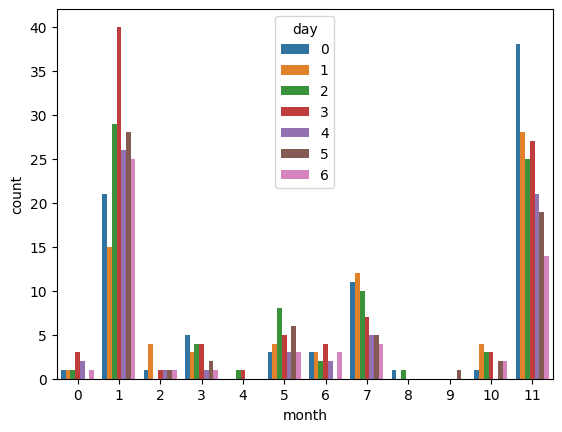

In [19]:
import seaborn as sns
sns.countplot(x='month', hue='day',data=data)

In [20]:
data.groupby('month')['day'].sum()

month
0      26
1     587
2      22
3      43
4       5
5      95
6      45
7     122
8       2
9       5
10     41
11    422
Name: day, dtype: int32

In [21]:
# # Pairplot over target variable
# sns.pairplot(data,height=1.5,corner=True)

In [22]:
# In scatterplot no single line can perfectly separate the data into respective class.
# So, non-linear models like DecisionTree, RandomForest, etc. may give better result than linear models
# like LogisticRegression.

In [23]:
corr_matrix=data.corr()
corr_matrix['area'].sort_values(ascending=False)

area     1.000000
DMC      0.067153
wind     0.066973
DC       0.066360
X        0.061995
temp     0.053487
FFMC     0.046799
month    0.039974
Y        0.038838
day      0.028812
rain     0.023311
ISI     -0.010347
RH      -0.053662
Name: area, dtype: float64

array([[<Axes: xlabel='area', ylabel='area'>,
        <Axes: xlabel='DMC', ylabel='area'>,
        <Axes: xlabel='wind', ylabel='area'>,
        <Axes: xlabel='DC', ylabel='area'>,
        <Axes: xlabel='ISI', ylabel='area'>,
        <Axes: xlabel='RH', ylabel='area'>],
       [<Axes: xlabel='area', ylabel='DMC'>,
        <Axes: xlabel='DMC', ylabel='DMC'>,
        <Axes: xlabel='wind', ylabel='DMC'>,
        <Axes: xlabel='DC', ylabel='DMC'>,
        <Axes: xlabel='ISI', ylabel='DMC'>,
        <Axes: xlabel='RH', ylabel='DMC'>],
       [<Axes: xlabel='area', ylabel='wind'>,
        <Axes: xlabel='DMC', ylabel='wind'>,
        <Axes: xlabel='wind', ylabel='wind'>,
        <Axes: xlabel='DC', ylabel='wind'>,
        <Axes: xlabel='ISI', ylabel='wind'>,
        <Axes: xlabel='RH', ylabel='wind'>],
       [<Axes: xlabel='area', ylabel='DC'>,
        <Axes: xlabel='DMC', ylabel='DC'>,
        <Axes: xlabel='wind', ylabel='DC'>,
        <Axes: xlabel='DC', ylabel='DC'>,
        <Axes: xlabe

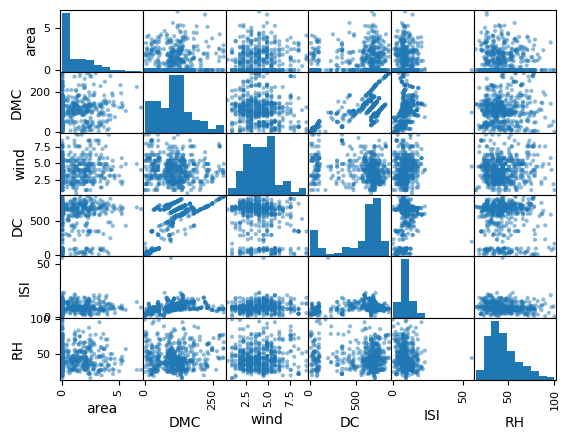

In [24]:
from pandas.plotting import scatter_matrix
attributes=['area','DMC','wind','DC','ISI','RH']
scatter_matrix(data[attributes])

<Axes: xlabel='DMC', ylabel='DC'>

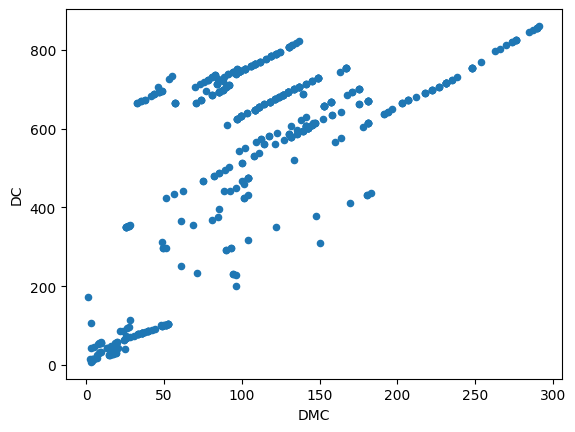

In [25]:
data.plot(kind='scatter',x='DMC',y='DC')

# Conclusion drawn from Data Exploration

In [26]:
# So, we will be using following variables as independent variables for our model.
data=data[['area','DMC','wind','DC','ISI','RH']]
data.head()

,area,DMC,wind,DC,ISI,RH
0,0.0,26.2,6.7,94.3,5.1,51
1,0.0,35.4,0.9,669.1,6.7,33
2,0.0,43.7,1.3,686.9,6.7,33
3,0.0,33.3,4.0,77.5,9.0,97
4,0.0,51.3,1.8,102.2,9.6,99


# Training and Testing Model
Separating features and labels

In [27]:
x=data.drop('area',axis=1) # Feature
y=data['area'] # Lable

# Train-Test split of data

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,DMC,wind,DC,ISI,RH
329,102.3,4.0,751.5,8.4,27
173,126.5,2.2,686.5,7.0,39
272,152.6,4.0,658.2,14.3,47
497,181.1,2.2,671.2,14.3,27
182,15.6,2.2,48.3,3.9,53
...,...,...,...,...,...
71,85.1,3.6,692.3,15.9,37
106,30.7,3.1,74.3,7.5,29
270,152.6,3.1,658.2,14.3,56
435,84.7,1.8,376.6,5.6,51


In [29]:
# del data,x,y # to free up memory usage

In [30]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train and Evaluation function

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [32]:
def trainn(x_train,y_train,model,hyperparameters): # this function returns best model and 
    # list of hyperparameters
    # model: logsticRegression, KNeighborsClassifier, etc.)
    # hyperparameters: deals with variables within models
    
    # Perform grid search with cross-validation
    grid_search=GridSearchCV(estimator=model, param_grid=hyperparameters, cv=5) # CV 5 allows to check in every train data 5 times
    # and throws an average error (average MSE) from which the best combination of hyperparameters is selected.
    grid_search.fit(x_train,y_train)
    
    # Print the best hyperparameters found
    best_params = grid_search.best_params_
    print('best hyperparameters: ',best_params)
    
    # Train the model with best hyperparameters
    best_model=model.set_params(**best_params)
    best_model.fit(x_train,y_train)
    
    return best_params,best_model

def evaluate_modell(x_test, y_test, best_model):
    # measure with test data
    # returns rmse score
    
    # prediction of test set
    y_pred=best_model.predict(x_test)
    
    # calculate evaluation metrics
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    print('rmse scores: ',rmse)

def another_evaluation_way(x_test, y_test, best_model):
    scores=cross_val_score(best_model,x_test,y_test,scoring='neg_mean_squared_error',cv=10)
    rmse=np.sqrt(-scores)

    #     print('rmse scores: ',rmse)
    print('rmse with CV mean: ',rmse.mean())
    print('rmse with CV standard deviation: ',rmse.std())

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [34]:
hyperparameters={
    'copy_X': [True,False],
    'fit_intercept': [True,False],
    'n_jobs': [1,2,3],
#     'positive': [True,False],
}
model=LinearRegression()
_,best_model1 = trainn(x_train, y_train, model, hyperparameters)
evaluate_modell(x_test, y_test, best_model1)
another_evaluation_way(x_test, y_test, best_model1)


best hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1}
rmse scores:  1.4711396971813355
rmse with CV mean:  1.446224278280357
rmse with CV standard deviation:  0.3562629737674493


# Decision Tree Regressor

In [35]:
hyperparameters={
    'max_depth': [2,3,4],
    'min_samples_split': [5,6,7,8,9,10,11,12,13,14],
}
model=DecisionTreeRegressor()
_,best_model2 = trainn(x_train, y_train, model, hyperparameters)
evaluate_modell(x_test, y_test, best_model2)
another_evaluation_way(x_test, y_test, best_model2)

best hyperparameters:  {'max_depth': 2, 'min_samples_split': 5}
rmse scores:  1.4606564912320827
rmse with CV mean:  1.4743997223929601
rmse with CV standard deviation:  0.34586145938148605


# Random Forest Regressor

In [36]:
hyperparameters={
    'n_estimators': [50,100,150,200,250],
    'max_depth': [2,3,4],
    'min_samples_split': [2,3,4,5],
}
model=RandomForestRegressor()
_,best_model3 = trainn(x_train, y_train, model, hyperparameters)
evaluate_modell(x_test, y_test, best_model3)
another_evaluation_way(x_test, y_test, best_model3)

best hyperparameters:  {'max_depth': 2, 'min_samples_split': 3, 'n_estimators': 100}
rmse scores:  1.4638518183872105
rmse with CV mean:  1.4304573446443947
rmse with CV standard deviation:  0.4331707703696693


# Result

In [37]:
# input and output real
features=x.iloc[-5:]
labels=y.iloc[-5:]
print(features)
real=np.exp(labels)-1

       DMC  wind     DC   ISI  RH
512   56.7   2.7  665.6   1.9  32
513   56.7   5.8  665.6   1.9  71
514   56.7   6.7  665.6   1.9  70
515  146.0   4.0  614.7  11.3  42
516    3.0   4.5  106.7   1.1  31


In [43]:
# Input and output calculated
# Model-1
raw_area1=best_model1.predict(features)
predicted_area1=(np.exp(raw_area1))-1
# Model -2
raw_area2=best_model2.predict(features)
predicted_area2=(np.exp(raw_area2))-1
# Model -3
raw_area3=best_model3.predict(features)
predicted_area3=(np.exp(raw_area3))-1

# print("Best algorithm: ",min())
print("real area:\n",real)
print("predicted_area by LinearRegressor: ",predicted_area1)
print("predicted_area by DecisionTreeeRegressor: ",predicted_area2)
print("predicted_area by RandomForestRegressor: ",predicted_area3)

real area:
 512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, dtype: float64
predicted_area by LinearRegressor:  [2.83737244e+09 2.65670599e+08 3.04300964e+08 3.90407353e+14
 6.06582657e+00]
predicted_area by DecisionTreeeRegressor:  [1.90069614 1.90069614 1.90069614 1.90069614 1.90069614]
predicted_area by RandomForestRegressor:  [2.08026418 2.08026418 2.08026418 2.49292746 2.07890464]


C:\Users\ashim\Desktop\python\venv\reallyvirtual\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\ashim\Desktop\python\venv\reallyvirtual\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\ashim\Desktop\python\venv\reallyvirtual\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [39]:
from sklearn import svm
# regr = svm.SVR()
# regr.fit(x_train, y_train)
# SVR()
model1=svm.SVR()
best_model1 = train(x_train, y_train, model1)
evaluate_model(x_test, y_test, best_model1)
another_evaluation_way(x_test, y_test, best_model1)

NameError: name 'train' is not defined